# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [78]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../data/'

In [79]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [81]:
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows",200)


app_train.T


,0,1,2,3,4,5,6,7,8,9,...,307501,307502,307503,307504,307505,307506,307507,307508,307509,307510
SK_ID_CURR,100002,100003,100004,100006,100007,100008,100009,100010,100011,100012,...,456245,456246,456247,456248,456249,456251,456252,456253,456254,456255
TARGET,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,...,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M,M,F,M,F,M,...,F,F,F,F,F,M,F,F,F,F
FLAG_OWN_CAR,N,N,Y,N,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,N,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,N,Y,Y,Y,N
CNT_CHILDREN,0,0,0,0,0,0,1,0,0,0,...,3,1,0,0,0,0,0,0,0,0
AMT_INCOME_TOTAL,202500,270000,67500,135000,121500,99000,171000,360000,112500,135000,...,81000,94500,112500,153000,112500,157500,72000,153000,171000,157500
AMT_CREDIT,406598,1.2935e+06,135000,312682,513000,490496,1.56073e+06,1.53e+06,1.01961e+06,405000,...,269550,225000,345510,331920,225000,254700,269550,677664,370107,675000
AMT_ANNUITY,24700.5,35698.5,6750,29686.5,21865.5,27517.5,41301,42075,33826.5,20250,...,11871,10620,17770.5,16096.5,22050,27558,12001.5,29979,20205,49117.5


In [88]:
df = app_train[['OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
df.columns = ['Occupation', 'TotalIncome', 'Credit', 'NumChildren', 'OwnCar','OwnRealty']
df

,Occupation,TotalIncome,Credit,NumChildren,OwnCar,OwnRealty
0,Laborers,202500.0,406597.5,0,N,Y
1,Core staff,270000.0,1293502.5,0,N,N
2,Laborers,67500.0,135000.0,0,Y,Y
3,Laborers,135000.0,312682.5,0,N,Y
4,Core staff,121500.0,513000.0,0,N,Y
...,...,...,...,...,...,...
307506,Sales staff,157500.0,254700.0,0,N,N
307507,NaN,72000.0,269550.0,0,N,Y
307508,Managers,153000.0,677664.0,0,N,Y
307509,Laborers,171000.0,370107.0,0,N,Y


In [89]:
df['OwnCar'] = df['OwnCar'].apply(lambda x: 1 if x == 'Y' else 0)
df['OwnRealty'] = df['OwnRealty'].apply(lambda x: 1 if x == 'Y' else 0)

df

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Occupation,TotalIncome,Credit,NumChildren,OwnCar,OwnRealty
0,Laborers,202500.0,406597.5,0,0,1
1,Core staff,270000.0,1293502.5,0,0,0
2,Laborers,67500.0,135000.0,0,1,1
3,Laborers,135000.0,312682.5,0,0,1
4,Core staff,121500.0,513000.0,0,0,1
...,...,...,...,...,...,...
307506,Sales staff,157500.0,254700.0,0,0,0
307507,NaN,72000.0,269550.0,0,0,1
307508,Managers,153000.0,677664.0,0,0,1
307509,Laborers,171000.0,370107.0,0,0,1


In [90]:
df_1 = df.groupby(by='Occupation').sum()
df_1

,TotalIncome,Credit,NumChildren,OwnCar,OwnRealty
Occupation,,,,,
Accountants,1.909397e+09,6.964849e+09,4794,3439,6659
Cleaning staff,6.085700e+08,2.377501e+09,1691,632,3336
Cooking staff,8.229056e+08,3.205930e+09,2877,1177,4086
Core staff,4.760145e+09,1.723740e+10,15386,8979,18413
Drivers,3.478977e+09,1.139125e+10,9522,12801,12202
HR staff,1.063599e+08,3.856456e+08,248,187,386
High skill tech staff,2.080742e+09,7.316336e+09,5394,4409,7729
IT staff,1.122829e+08,3.406364e+08,209,230,314
Laborers,9.180604e+09,3.149012e+10,28241,21696,37551


In [91]:
cnt = df.groupby(by='Occupation').count()
cnt

,TotalIncome,Credit,NumChildren,OwnCar,OwnRealty
Occupation,,,,,
Accountants,9813,9813,9813,9813,9813
Cleaning staff,4653,4653,4653,4653,4653
Cooking staff,5946,5946,5946,5946,5946
Core staff,27570,27570,27570,27570,27570
Drivers,18603,18603,18603,18603,18603
HR staff,563,563,563,563,563
High skill tech staff,11380,11380,11380,11380,11380
IT staff,526,526,526,526,526
Laborers,55186,55186,55186,55186,55186


In [92]:
df_2 = (df_1/cnt).reset_index()
df_2

,Occupation,TotalIncome,Credit,NumChildren,OwnCar,OwnRealty
0,Accountants,194578.357842,709757.377255,0.488536,0.350453,0.678590
1,Cleaning staff,130790.895551,510960.949710,0.363421,0.135826,0.716957
2,Cooking staff,138396.508176,539174.315843,0.483855,0.197948,0.687185
3,Core staff,172656.695254,625223.129380,0.558070,0.325680,0.667864
4,Drivers,187011.606413,612333.969037,0.511853,0.688115,0.655916
5,HR staff,188916.282416,684983.277975,0.440497,0.332149,0.685613
6,High skill tech staff,182842.045683,642911.751538,0.473989,0.387434,0.679174
7,IT staff,213465.601711,647597.797529,0.397338,0.437262,0.596958
8,Laborers,166357.482525,570617.995597,0.511742,0.393143,0.680444
9,Low-skill Laborers,133228.001911,458464.781653,0.460105,0.308170,0.677496


In [93]:
'''
資料小發現 - 1

職位為經理的人, 年收入最高
其次為IT人員、房仲
'''

df_2_sort = df_2.sort_values('TotalIncome', ascending=False)
df_2_sort

,Occupation,TotalIncome,Credit,NumChildren,OwnCar,OwnRealty
10,Managers,260336.681717,775091.194516,0.509522,0.523045,0.690468
7,IT staff,213465.601711,647597.797529,0.397338,0.437262,0.596958
13,Realty agents,195003.994674,655275.649134,0.511318,0.335553,0.672437
0,Accountants,194578.357842,709757.377255,0.488536,0.350453,0.678590
5,HR staff,188916.282416,684983.277975,0.440497,0.332149,0.685613
4,Drivers,187011.606413,612333.969037,0.511853,0.688115,0.655916
6,High skill tech staff,182842.045683,642911.751538,0.473989,0.387434,0.679174
12,Private service staff,182334.812783,630664.503394,0.514329,0.291855,0.686275
3,Core staff,172656.695254,625223.129380,0.558070,0.325680,0.667864
8,Laborers,166357.482525,570617.995597,0.511742,0.393143,0.680444


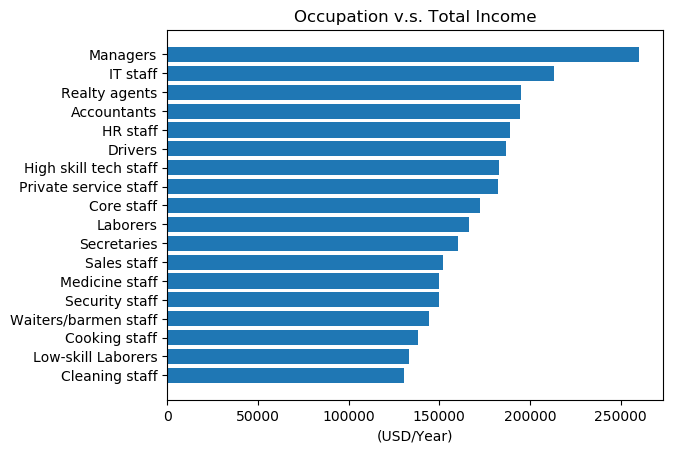

In [94]:
# bar chart
plt.rcdefaults()
fig, ax = plt.subplots()
Occu = df_2_sort['Occupation']
y =  np.arange(len(Occu))
x = df_2_sort['TotalIncome']


ax.barh(y, x)
ax.set_yticks(y)
ax.set_yticklabels(Occu)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('(USD/Year)')
ax.set_title('Occupation v.s. Total Income')

plt.show()

In [95]:
'''
資料小發現 - 2

清潔人員擁有房產的比例最高, 達71.7%
'''

df_3_sort = df_2.sort_values('OwnRealty', ascending=False)
df_3_sort

,Occupation,TotalIncome,Credit,NumChildren,OwnCar,OwnRealty
1,Cleaning staff,130790.895551,510960.949710,0.363421,0.135826,0.716957
11,Medicine staff,149709.643434,607430.703057,0.500996,0.223615,0.698372
16,Security staff,149662.695953,557080.293334,0.376283,0.392501,0.697962
10,Managers,260336.681717,775091.194516,0.509522,0.523045,0.690468
2,Cooking staff,138396.508176,539174.315843,0.483855,0.197948,0.687185
14,Sales staff,152302.874710,563258.492088,0.502181,0.268644,0.686624
12,Private service staff,182334.812783,630664.503394,0.514329,0.291855,0.686275
5,HR staff,188916.282416,684983.277975,0.440497,0.332149,0.685613
8,Laborers,166357.482525,570617.995597,0.511742,0.393143,0.680444
6,High skill tech staff,182842.045683,642911.751538,0.473989,0.387434,0.679174


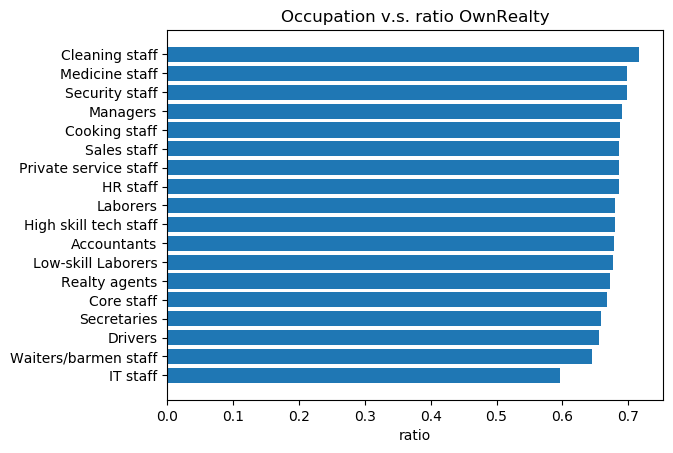

In [97]:
# bar chart
plt.rcdefaults()
fig, ax = plt.subplots()
Occu = df_3_sort['Occupation']
y =  np.arange(len(Occu))
x = df_3_sort['OwnRealty']


ax.barh(y, x)
ax.set_yticks(y)
ax.set_yticklabels(Occu)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('ratio')
ax.set_title('Occupation v.s. ratio OwnRealty')

plt.show()